## Grupo NPL 7
## Franz Josef Haidacher Avila
## Victor Ernesto De Leon Müller
## Jaime Miguel García González
## Curso TEXT MINING & NATURAL LANGUAGE PROCESSING - SECCIÓN - 10 -2022 -1
## UVG


In [1]:
#!pip install numpy
#!pip install pandas
import numpy as np
import pandas as pd


## Obtención de Dataset utilizado (Tripadvisor)

In [2]:
df= pd.read_csv("C://Users//jmgarcia//puerto_escondido_hotels.csv")

In [9]:
df.head()

,rating,review
0,50,"In the Hotel the had a good room service, the ..."
1,40,We spent a night here at this hotel when we fi...
2,40,Our room was clean and only a short walk to th...
3,10,Booked for 8 nights but stayed one( only becau...
4,20,This is the loudest hotel I’ve ever stayed at....


In [10]:
df.iloc[1:100]

,rating,review
1,40,We spent a night here at this hotel when we fi...
2,40,Our room was clean and only a short walk to th...
3,10,Booked for 8 nights but stayed one( only becau...
4,20,This is the loudest hotel I’ve ever stayed at....
5,40,My wife and I decided to make a spur of the mo...
...,...,...
95,40,This hotel has it all. Perfect location in the...
96,50,This hotel is probably one of the best on the ...
97,50,Three couples have just returned from a two we...
98,50,We just love it perfect for relax really not e...


In [11]:
df.shape

(4824, 2)

In [12]:
df.isnull().sum()

rating    0
review    0
dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending=False)

rating    0
review    0
dtype: int64

In [8]:
#df.dropna(inplace=True)

In [14]:
df["rating"].value_counts()

50    3507
40     780
30     245
10     151
20     141
Name: rating, dtype: int64

In [15]:
df["Positively Rated"]= np.where(df["rating"]>30, 1, 0)

In [16]:
df.shape

(4824, 3)

In [17]:
df.head()

,rating,review,Positively Rated
0,50,"In the Hotel the had a good room service, the ...",1
1,40,We spent a night here at this hotel when we fi...,1
2,40,Our room was clean and only a short walk to th...,1
3,10,Booked for 8 nights but stayed one( only becau...,0
4,20,This is the loudest hotel I’ve ever stayed at....,0


In [18]:
df["Positively Rated"].value_counts()

1    4287
0     537
Name: Positively Rated, dtype: int64

In [19]:
#!pip install seaborn
import seaborn as sns

C:\Users\vdeleon\Anaconda3\envs\trip\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positively Rated', ylabel='count'>

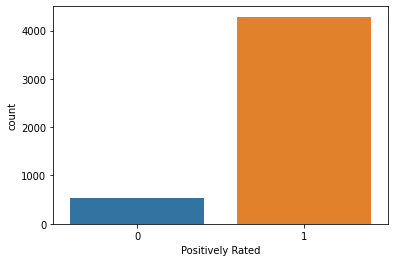

In [19]:
sns.countplot(df["Positively Rated"])

## Definición de XTrain y Xtest del Modelo de Entrenamiento y Prueba  

In [20]:
#! pip install sklearn
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df["review"],df["Positively Rated"],random_state=50)

In [22]:
print(X_train)

3456    It was our first visit to the Posada Real in P...
3702    We stayed here in January for a couple of nigh...
1696    The place was very clean, surprisingly quiet a...
249     The hotel is in a perfect location at the hear...
2227    If you come here you will never want to go to ...
                              ...                        
3330    great place to stay while visiting puerto esco...
70      Very lovely hotel with good friendly staff at ...
132     Super nice place, very very clean and very nic...
2014    My Wife and I spent 10 idyllic days at the Hot...
1931    We have rented the whole house for 3 families,...
Name: review, Length: 3618, dtype: object


In [49]:
pd.set_option('display.max_colwidth',None)

In [50]:
X_train

3456      It was our first visit to the Posada Real in Puerto with friends who have stayed at this resort before.  Their recommendation did not disappoint.  Our two week stay  was easy living and healthy.  There are plenty of stairs for a work out each day to and from the beach area (you can have a ride down ride if you prefer) which is nicely set back from the ocean. I liked the privacy that was available during our stay.  We were free to use the pools and restaurants with no crowds and in fact on some occasions  it felt like a private paradise of my own! The dining areas are outside which I enjoy.  There were many days buffets were available with freshly prepared vegetables and fish.  At others you could order from a menu which similar items to the buffets.  A few trips into town for
3702                                                                                                                                                                                   We stayed here in Ja

In [24]:
X_train.shape

(3618,)

In [24]:
X_train[1]

"We spent a night here at this hotel when we first pulled in to town.... it was adequate for our purposes.... the internet wifi worked just outside our room door.  The staff were friendly and helpful even though we didn't speak Spanish."

In [47]:
X_test

4191    Stayed here while on a solo surf trip in Mexic...
1742    Fabulous setting, great food and wonderful hos...
4714    The Quinta Lili was a lovely friendly place.  ...
2871    This place was great for meeting people and so...
4487    My husband and I spent a week and a half at Vi...
                              ...                        
3705    Friendly staff, Lovely swimming pool for cooli...
3413    We stayed here many moons ago & I'm so pleased...
737     Paul and Luisa are perfect hosts- gracious and...
2024    Staying a casa Kei is like staying with friend...
3488    We stayed here for 2 nights.  The rooms was ve...
Name: review, Length: 1206, dtype: object

In [27]:
X_test.shape

(1206,)

## Vectorización

In [71]:
#! pip install sklearn
from sklearn.feature_extraction.text import CountVectorizer

#### Modelo 1

In [289]:
""""
vect=CountVectorizer(min_df=5,
                     ngram_range=(1,3),
                     max_df=0.50,
                     strip_accents = 'unicode', # works
                     lowercase = True, # works
                     #token_pattern
                     #max_features=4000
                     stop_words='english').fit(X_train)


In [290]:
#vect.vocabulary_
#
len(vect.stop_words_)

267670

In [291]:
len(vect.vocabulary_)

7196

#### Modelo 2

In [324]:
""""
vect=CountVectorizer(min_df=10,
                     ngram_range=(1,3),
                     max_df=0.80,
                     strip_accents = 'unicode', # works
                     lowercase = True, # works
                     #token_pattern
                     #max_features=4000
                     stop_words='english').fit(X_train)

In [325]:
len(vect.stop_words_)

271574

In [326]:
len(vect.vocabulary_)

3292

#### Modelo 3

In [359]:
""""
vect=CountVectorizer(min_df=5,
                     ngram_range=(1,3),
                     max_df=0.80,
                     strip_accents = 'unicode', # works
                     lowercase = True, # works
                     #token_pattern
                     max_features=2000,
                     stop_words='english').fit(X_train)

In [360]:
len(vect.stop_words_)

272866

In [361]:
len(vect.vocabulary_)

2000

#### Modelo 4

In [399]:


vect=CountVectorizer(min_df=5,
                     ngram_range=(1,3),
                     max_df=0.80,
                     strip_accents = 'unicode', # works
                     lowercase = True, # works
                     token_pattern ='(?<!\S)[A-Za-z]+(?!\S)|(?<!\S)[A-Za-z]+(?=:(?!\S))',
                     #max_features=2000
                     stop_words='english').fit(X_train)

In [400]:
len(vect.stop_words_)

213831

In [409]:
len(vect.vocabulary_)

5285

In [ ]:
#Vectorizacion sobre X_train
X_train_vectorized=vect.transform(X_train)

In [408]:
_, col_index = X_train_vectorized[1].nonzero()
for i in col_index:
    print(sorted(list(vect.vocabulary_))[i])

able
access
away
away main
balcony
beach
beach short
beach short walk
beaches
couple
definitely
definitely recommend
extend
extend stay
food
friendly
good
good hotel
happy
hotel
hotel minutes
hotel rooms
hours
internet
internet access
january
journey
lovely
main
main beach
minutes
minutes away
owners
owners really
place
pool
pool really
quieter
really
really friendly
really good
reasonably
recommend
recommend place
return
rooms
rooms balcony
short
short walk
stay
stayed
thoroughly
view
view pool
waiting
walk


## Clasificación utilizando dos modelos (Regresión Logistica y Naive Bayes (Bernoulli)

In [242]:
""""

#Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()


In [411]:
#Modelo Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB(
        alpha=1.0,
        binarize=0.0,
        fit_prior=True,
        class_prior=None
)

### Entrenamiento del Modelo




In [412]:
#Training del modelo
model.fit(X_train_vectorized, y_train)

BernoulliNB()

In [413]:
#Imprimir que modelo se está utilizando
model

BernoulliNB()

### Predicción

In [414]:
#Save predictions
predictions= model.predict(vect.transform(X_test))

In [246]:
#X_test.head()


### Predicción de una Frase (Sanity Check)

In [455]:
#sentence='So good that crab, i am very happy'
#sentence='i am feel bad about the service, is really the worst, i would really think twice next time, i am unsatisfied.'
#sentence='the service was very bad the attention worse i am unsatisfied.'
#sentence='the Quinta Lili was a lovely friendly place.  Small enough to be intimater but no encroaching on private space.  The key was the hands-on-service and enthusiasm of all the staff but especially the two owners who could not have been more friendly, engaging and helpful.  The food was great too - fresh juice . fruit and prepared fare.'
sentence='There are more cons than pros about this place unfortunately. Nice amenities, good enough internet to have your video calls but it all gets ruined by customer service. Ive been here 4 times and got disappointed each time because they change rules and make you pay for it. There is no way you can track the rules either. Initially I came here to relax and enjoy myself in a comfortable space. Unfortunately everytime I tried to do this, one of their employees would come up to me and haggle me for one thing or another. First they let you in without buying a day pass but not using a pool. Second time they tell you cant do it and you in have to pay for the day pass. The day pass price changes on a daily basis whenever they want. Regardless, each time I have been there I spent over.'

In [456]:
vector_pred=[sentence]
vector_pred

['There are more cons than pros about this place unfortunately. Nice amenities, good enough internet to have your video calls but it all gets ruined by customer service. Ive been here 4 times and got disappointed each time because they change rules and make you pay for it. There is no way you can track the rules either. Initially I came here to relax and enjoy myself in a comfortable space. Unfortunately everytime I tried to do this, one of their employees would come up to me and haggle me for one thing or another. First they let you in without buying a day pass but not using a pool. Second time they tell you cant do it and you in have to pay for the day pass. The day pass price changes on a daily basis whenever they want. Regardless, each time I have been there I spent over.']

## Función Predict (Devuelve una clase positiva o negativa)

In [457]:
predictions_phrase= model.predict(vect.transform(vector_pred))

In [458]:
print(predictions_phrase)

[0]


## Matriz de Confusión

In [430]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, predictions)
cf

array([[  79,   61],
       [  44, 1022]], dtype=int64)

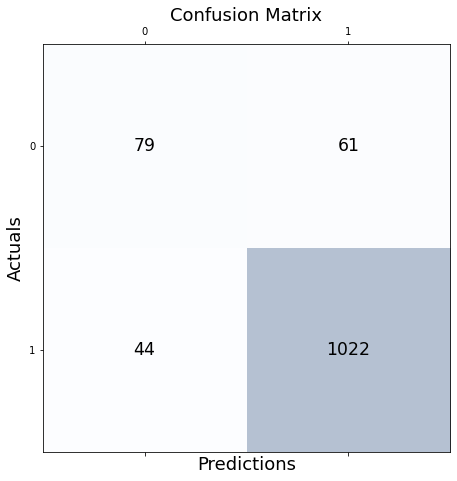

In [416]:
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Metricas (Precision, Recall y F1 Score)

In [417]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions)
#precision 

(array([0.64227642, 0.94367498]),
 array([0.56428571, 0.9587242 ]),
 array([0.60076046, 0.95114007]),
 array([ 140, 1066], dtype=int64))

In [418]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp,fn,fp,tn)

1022 44 61 79


In [419]:
precision=tp/(tp+fp)
recall= tp/(tp+fn)
f1=2*(precision*recall)/(precision+recall)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:", f1)

Precision: 0.9436749769159741
Recall: 0.9587242026266416
F1 Score: 0.9511400651465798


In [420]:
#List1=[precision,recall,f1]
#List2=[precision,recall,f1]
#List3=[precision,recall,f1]
#List4=[precision,recall,f1]
#List5=[precision,recall,f1]
#List6=[precision,recall,f1]
#List7=[precision,recall,f1]
List8=[precision,recall,f1]

In [421]:
print(List1)
print(List2)
print(List3)
print(List4)
print(List5)
print(List6)
print(List7)
print(List8)

[0.9336917562724014, 0.9774859287054409, 0.9550870760769936]
[0.9350180505415162, 0.9718574108818011, 0.953081876724931]
[0.9414990859232175, 0.9662288930581614, 0.9537037037037036]
[0.9253333333333333, 0.9765478424015009, 0.9502510269283433]
[0.9539906103286385, 0.9530956848030019, 0.9535429375879868]
[0.971540726202159, 0.9287054409005628, 0.9496402877697842]
[0.9723320158102767, 0.9230769230769231, 0.9470644850818096]
[0.9436749769159741, 0.9587242026266416, 0.9511400651465798]


## Resultados por modelo validado:

In [459]:
import pandas as pd

resultado = pd.DataFrame([])

resultado = pd.DataFrame([List1,List2,List3,List4,List5,List6,List7,List8])

resultado.columns = {'Precision', 'Recall', 'F1'}

print(resultado)

         F1    Recall  Precision
0  0.933692  0.977486   0.955087
1  0.935018  0.971857   0.953082
2  0.941499  0.966229   0.953704
3  0.925333  0.976548   0.950251
4  0.953991  0.953096   0.953543
5  0.971541  0.928705   0.949640
6  0.972332  0.923077   0.947064
7  0.943675  0.958724   0.951140


## Esta gráfica muestra el resultado de los 8 modelos.
## El modelo que nos brindó el mejor resultado fue el Naive Bayes 2 (nb2)

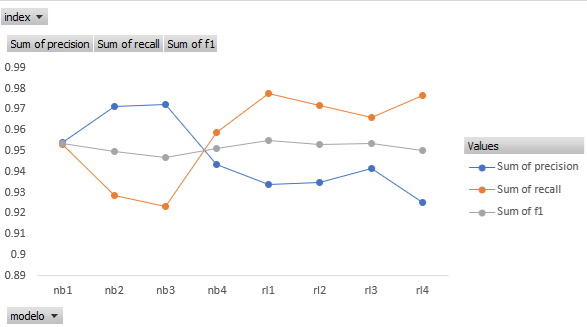

In [462]:
conclu= pd.read_csv("C://Users//jmgarcia//book.csv")
conclu.head(10)

,Classifier,Vocabulary,Predict(Negative),Predict(Positive),Comentarios
0,LogReg,7196,2,3,NaN
1,LogReg,3292,2,3,NaN
2,LogReg,2000,2,3,NaN
3,LogReg,5285,1,4,NaN
4,BernoulliNB,7196,1,4,NaN
5,BernoulliNB,3292,3,2,Correcto en todas las predicciones de frases
6,BernoulliNB,2000,4,1,El que peor acertó a las predicciones de frases
7,BernoulliNB,5285,1,4,NaN


## Variaciones de hiperparámetros realizadas:
## Se utilizarón dos algoritmos de clasificación y se realizarón cambios de hiperparámetros únicamente en la función CountVectorizer.

## * Modelo 1, Regresión logística, Countvectorizer: min_df=5; max_df=0.5;ngram_range=(1,3);strip_accents=unicode;lowercase=True;stop_words=english

## * Modelo 2, Regresión logística, Countvectorizer: se vario de min_df=5 a min_df=10

## * Modelo 3, Regresión logística, Countvectorizer: se agregó el feature max_features=2000 y se devolvió el min_df=5

## * Modelo 4, Regresión logística, Countvectorizer: se removió el feature max_features=2000 y se agregó el token_pattern ='(?<!\S)[A-Za-z]+(?!\S)|(?<!\S)[A-Za-z]+(?=:(?!\S))'

## Para los modelos 5 al 8, se realizó  la misma secuencia de cambios en la función Countvectorizer, pero con el algoritomo BernoulliNB()

## Se probó el hiperparámetro tokenizer=LemmaTokenizer() , pero este ocasionó que no pudieramos ejecutar otros hiperparámetros, por ejemplo el de stop_words. Por lo que optamos, no incluirlo. 

# Conclusiones de la Tarea:
## El mejor modelo que vemos desde las predicciones de las frases, es el de BernoulliNB; con parámetro min_df igual a 10 en la función Countvectorizer.
## En las frases propuestas se consideraron 3 con sentido negativo y 2 con sentido positivo validadas en la función predict solamente el modelo 6 (nb2), cumplió con exactitud las expectativas de predicción.